In [25]:
#import pandas for data analytics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#use fill color styles for styling excelsheet
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import FormulaRule
#read csv sales data
sales=pd.read_csv("sales_data.csv",index_col=0)
sales

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1003,2024-01-05,Charlie,North,Keyboard,1.0,45.0,45.0
1004,2024-01-07,NaN,South,Monitor,2.0,180.0,360.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1007,2024-01-15,Fiona,North,Laptop,2.0,850.0,1700.0
1008,2024-01-18,George,NaN,Keyboard,1.0,45.0,45.0
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0


In [3]:
#check missing values
sales.isnull().sum()
#1 customer missing name
#1 region missing
#1 product missing
#1 quantity missing
#1 unit price missing


order_date       0
customer_name    1
region           1
product          1
quantity         2
unit_price       1
total_amount     2
dtype: int64

In [11]:
#missing values
missing_values=sales[sales.isna().any(axis=1)]
missing_values

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1004,2024-01-07,NaN,South,Monitor,2.0,180.0,360.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1008,2024-01-18,George,NaN,Keyboard,1.0,45.0,45.0
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0
1015,2024-02-10,Nina,West,NaN,2.0,45.0,90.0
1017,2024-02-15,Paula,South,Keyboard,NaN,45.0,NaN


In [5]:
#total customers
total_customers=len(sales)
print("Total customers: ",total_customers)

Total customers:  20


In [27]:
#customer with missing name
customer_name_missing=sales[sales["customer_name"].isna()]
customer_name_missing

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1004,2024-01-07,NaN,South,Monitor,2.0,180.0,360.0


In [31]:
#Total customers with names missing
print("Total customers with names missing: ",len(customer_name_missing))

Total customers with names missing:  1


In [6]:
#customers with no missing name
customer_name_exists=sales[sales["customer_name"].notna()]
#fetch rows with customer names
customer_name_exists


,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1003,2024-01-05,Charlie,North,Keyboard,1.0,45.0,45.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1007,2024-01-15,Fiona,North,Laptop,2.0,850.0,1700.0
1008,2024-01-18,George,NaN,Keyboard,1.0,45.0,45.0
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0
1010,2024-01-22,Ian,East,Mouse,3.0,25.0,75.0


In [7]:
#total customers with no name missing
print("Total customers with no name missing: ",len(customer_name_exists))

Total customers with no name missing:  19


In [8]:
#total regions
total_regions=sales[['region']]
print("Total regions: ",len(total_regions))

Total regions:  20


In [9]:
#filter out regions missing
missing_regions=sales[sales['region'].isna()]
missing_regions

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1008,2024-01-18,George,NaN,Keyboard,1.0,45.0,45.0


In [35]:
#total missing regions
print("Total regions missing: ",len(missing_regions))


Total regions missing:  1


In [12]:
#regions with no missing values
region_with_values=sales[sales['region'].notna()]
#fetch results
region_with_values

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1003,2024-01-05,Charlie,North,Keyboard,1.0,45.0,45.0
1004,2024-01-07,NaN,South,Monitor,2.0,180.0,360.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1007,2024-01-15,Fiona,North,Laptop,2.0,850.0,1700.0
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0
1010,2024-01-22,Ian,East,Mouse,3.0,25.0,75.0


In [39]:
#total regions with no missing values
print("Total regions with no missing values: ",len(region_with_values))

Total regions with no missing values:  19


In [42]:
#missing product
missing_product=sales[sales['product'].isna()]
missing_product

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1015,2024-02-10,Nina,West,NaN,2.0,45.0,90.0


In [43]:
#missing unit_price
missing_unit_price=sales[sales['unit_price'].isna()]
missing_unit_price


,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0


In [44]:
#missing total amount
missing_total_amount=sales[sales['total_amount'].isna()]
missing_total_amount

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1017,2024-02-15,Paula,South,Keyboard,NaN,45.0,NaN


In [52]:
#complete dataset with no missing values
complete_dataset=sales.dropna()
complete_dataset


,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1003,2024-01-05,Charlie,North,Keyboard,1.0,45.0,45.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1007,2024-01-15,Fiona,North,Laptop,2.0,850.0,1700.0
1010,2024-01-22,Ian,East,Mouse,3.0,25.0,75.0
1011,2024-02-01,Jane,West,Laptop,1.0,850.0,850.0
1012,2024-02-03,Kevin,North,Keyboard,2.0,45.0,90.0
1013,2024-02-05,Linda,South,Mouse,4.0,25.0,100.0


In [53]:
#total complete dataset
print("Total dataset with no missing values: ",len(complete_dataset))

Total dataset with no missing values:  14


In [55]:
#occurrence for regions
sales['region'].value_counts()
#most customers are from East,West and North


region
East     5
West     5
North    5
South    4
Name: count, dtype: int64

In [58]:
missing_percent=sales.isna().mean()*100
missing_percent

order_date        0.0
customer_name     5.0
region            5.0
product           5.0
quantity         10.0
unit_price        5.0
total_amount     10.0
dtype: float64

In [61]:
#product occurrence
product_occurrence=sales['product'].value_counts()
product_occurrence

product
Laptop      6
Mouse       5
Keyboard    4
Monitor     4
Name: count, dtype: int64

In [76]:
#east total
east_sales=sales[sales["region"]=="East"]
east

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1010,2024-01-22,Ian,East,Mouse,3.0,25.0,75.0
1014,2024-02-07,Mike,East,Monitor,1.0,180.0,180.0
1018,2024-02-18,Quinn,East,Mouse,1.0,25.0,25.0


In [78]:
#east total
west_sales=sales[sales["region"]=="West"]
west_sales

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1011,2024-02-01,Jane,West,Laptop,1.0,850.0,850.0
1015,2024-02-10,Nina,West,NaN,2.0,45.0,90.0
1019,2024-02-20,Rachel,West,Monitor,2.0,180.0,360.0


In [16]:
#calculate amount per region
revenue_by_region=(sales
    .groupby(["region"],as_index=False)
    .agg(
        total_sales=("total_amount","sum"),
        average_sales=("total_amount","mean")
    ).round(2)
                  )
revenue_by_region

,region,total_sales,average_sales
0,East,1980.0,396.00
1,North,5235.0,1047.00
2,South,640.0,213.33
3,West,1350.0,337.50


In [19]:
#calculate total revenue
total_revenue=revenue_by_region["total_sales"].sum()
print("Total revenue: ",total_revenue)

Total revenue:  9205.0


In [20]:
#add revenue percentage
revenue_by_region["revenue_percentage"]=((revenue_by_region["total_sales"]/total_revenue)*100).round(2)
revenue_by_region

,region,total_sales,average_sales,revenue_percentage
0,East,1980.0,396.00,21.51
1,North,5235.0,1047.00,56.87
2,South,640.0,213.33,6.95
3,West,1350.0,337.50,14.67


In [21]:
regional_sales=pd.pivot_table(
    revenue_by_region,
    index="region",
    values=["total_sales","average_sales","revenue_percentage"],
    
)
regional_sales=regional_sales[["total_sales","average_sales","revenue_percentage"]]
regional_sales

,total_sales,average_sales,revenue_percentage
region,,,
East,1980.0,396.00,21.51
North,5235.0,1047.00,56.87
South,640.0,213.33,6.95
West,1350.0,337.50,14.67


In [22]:
#sort regional sales by
by_total_sales=regional_sales.sort_values(by="total_sales",ascending=False).copy()


In [23]:
by_average_sales=regional_sales.sort_values(by="average_sales",ascending=False).copy()

In [24]:
#convert to excelsheet
with pd.ExcelWriter("regional_sales.xlsx",engine="openpyxl") as writer:
    regional_sales.reset_index().to_excel(writer,sheet_name="All regions",index=False)
    by_total_sales.reset_index().to_excel(writer,sheet_name="Sorted by Total sales",index=False)
    by_average_sales.reset_index().to_excel(writer,sheet_name="Sorted by Average sales",index=False)
    #color highlighting
    highlight=PatternFill(
        start_color="0000FF00",
        end_color="0000FF00",
        fill_type="solid")
    for sheet_name in ["All regions","Sorted by Total sales","Sorted by Average sales"]:
        ws=writer.sheets[sheet_name]
        max_row=ws.max_row
        #highlight highest sales value
        ws.conditional_formatting.add(f"B2:B{max_row}",FormulaRule(formula=[f"B2=MAX(B$2:B${max_row})"],fill=highlight))
        ws.conditional_formatting.add(f"D2:D{max_row}",FormulaRule(formula=[f"D2=MAX(D$2:D${max_row})"],fill=highlight))
        
        
    

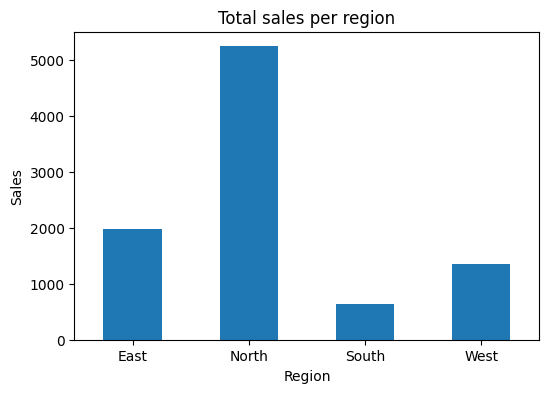

In [65]:
#plot bar graph for sales per region
regional_sales["total_sales"].plot(kind="bar",figsize=(6,4))
plt.title("Total sales per region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.savefig('total_sales.png')
# plt.show()

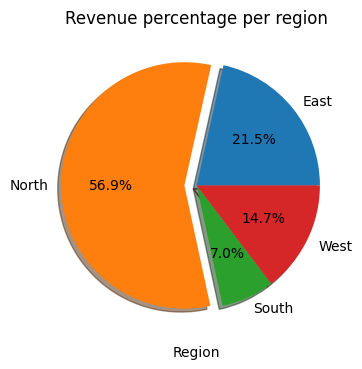

In [66]:
#plot pie chart for revenue percentage
regional_sales["revenue_percentage"].plot(kind="pie",shadow=True,explode=[0,0.1,0,0],autopct="%1.1f%%",figsize=(6,4))
plt.title("Revenue percentage per region")
plt.xlabel("Region")
plt.ylabel("")
plt.xticks(rotation=0)
plt.savefig('revenue_percentage.png')
# plt.show()

In [69]:
sales

,order_date,customer_name,region,product,quantity,unit_price,total_amount
order_id,,,,,,,
1001,2024-01-02,Alice,East,Laptop,1.0,850.0,850.0
1002,2024-01-03,Bob,West,Mouse,2.0,25.0,50.0
1003,2024-01-05,Charlie,North,Keyboard,1.0,45.0,45.0
1004,2024-01-07,NaN,South,Monitor,2.0,180.0,360.0
1005,2024-01-10,Diana,East,Laptop,1.0,850.0,850.0
1006,2024-01-12,Evan,West,Mouse,NaN,25.0,NaN
1007,2024-01-15,Fiona,North,Laptop,2.0,850.0,1700.0
1008,2024-01-18,George,NaN,Keyboard,1.0,45.0,45.0
1009,2024-01-20,Hannah,South,Monitor,1.0,NaN,180.0


In [83]:
print("TOTAL REVENUE: ",product_amount["total_amount"].sum())

TOTAL REVENUE:  9160.0


In [86]:
#fetch region,product and amount paid
region_product_amount=sales[["region","product","total_amount"]]
region_product_amount

,region,product,total_amount
order_id,,,
1001,East,Laptop,850.0
1002,West,Mouse,50.0
1003,North,Keyboard,45.0
1004,South,Monitor,360.0
1005,East,Laptop,850.0
1006,West,Mouse,NaN
1007,North,Laptop,1700.0
1008,NaN,Keyboard,45.0
1009,South,Monitor,180.0


In [87]:
#remove missing values
complete_data=region_product_amount.dropna()
complete_data

,region,product,total_amount
order_id,,,
1001,East,Laptop,850.0
1002,West,Mouse,50.0
1003,North,Keyboard,45.0
1004,South,Monitor,360.0
1005,East,Laptop,850.0
1007,North,Laptop,1700.0
1009,South,Monitor,180.0
1010,East,Mouse,75.0
1011,West,Laptop,850.0


In [88]:
print("Total amount: ",complete_data["total_amount"].sum())

Total amount:  9115.0


In [90]:
#group data by product
products_summary=(
    complete_data
    .groupby(["product"],as_index=False)
    .agg(total_sales=("total_amount","sum"))
)
products_summary

,product,total_sales
0,Keyboard,135.0
1,Laptop,7650.0
2,Monitor,1080.0
3,Mouse,250.0


In [93]:
grand_total=products_summary["total_sales"].sum()
#add percentage
products_summary["percentage"]=((products_summary["total_sales"]/grand_total)*100).round(2)
products_summary


,product,total_sales,percentage
0,Keyboard,135.0,1.48
1,Laptop,7650.0,83.93
2,Monitor,1080.0,11.85
3,Mouse,250.0,2.74


In [100]:
#convert to pivot table
summary=pd.pivot_table(products_summary,index="product",values=["total_sales","percentage"])
summary=summary[["total_sales","percentage"]]
summary

,total_sales,percentage
product,,
Keyboard,135.0,1.48
Laptop,7650.0,83.93
Monitor,1080.0,11.85
Mouse,250.0,2.74


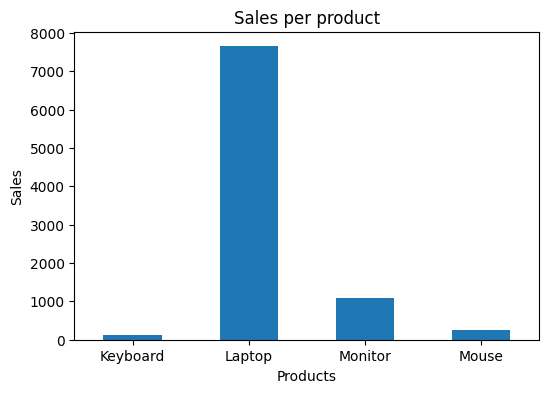

In [130]:
#plot bar graph for sales per product
summary["total_sales"].plot(kind="bar",figsize=(6,4))
plt.title("Sales per product")
plt.xlabel("Products")
plt.ylabel("Sales")
# Customize scale
# plt.ylim(0, summary["total_sales"].max() + 500)  # add some padding on top
plt.xticks(rotation=0)
plt.savefig("product_sales_summary.png")
plt.show()

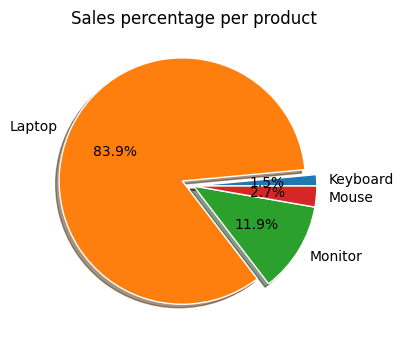

In [131]:
#plot pie chart for product sales
summary["percentage"].plot(
    kind="pie",
    shadow=True,
    explode=[0,0.1,0,0],
    figsize=(8,4),
    autopct="%1.1f%%",
    # startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title("Sales percentage per product")
plt.xlabel("")
plt.ylabel("")
plt.savefig("sales_percentage_per_product.png")
plt.show()